In [ ]:
import pandas as pd

y2025 =pd.read_excel("2025end.xlsx")

y2025.head()

,Team,Season,GP,W,L,T,OT,P,P%,RW,...,PP%,PK%,Net PP%,Net PK%,Shots/GP,SA/GP,FOW%,PLOF,CF,SC
0,Winnipeg Jets,20242025,74,51,19,--,4,106,0.716,40,...,29.5,79.7,28.0,81.8,28.0,27.2,49.2,NaN,NaN,NaN
1,Washington Capitals,20242025,73,47,17,--,9,103,0.705,40,...,21.8,82.2,18.8,85.5,27.6,27.1,50.3,NaN,NaN,NaN
2,Dallas Stars,20242025,74,49,21,--,4,102,0.689,40,...,22.5,84.7,20.7,87.7,28.6,28.4,52.0,NaN,NaN,NaN
3,Vegas Golden Knights,20242025,73,45,20,--,8,98,0.671,42,...,30.8,75.5,29.0,78.9,30.4,26.5,50.0,NaN,NaN,NaN
4,Toronto Maple Leafs,20242025,74,45,25,--,4,94,0.635,36,...,26.2,78.3,22.8,81.1,28.2,29.4,53.9,NaN,NaN,NaN


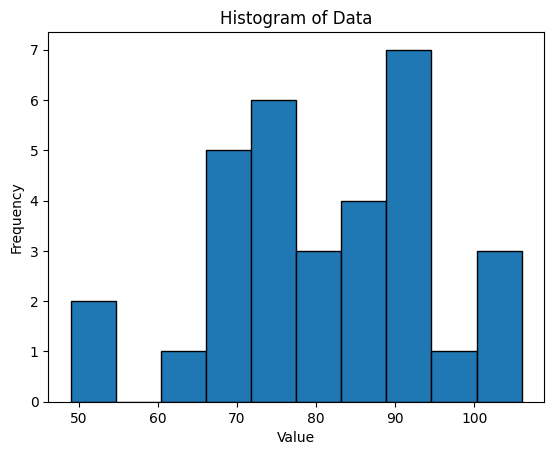

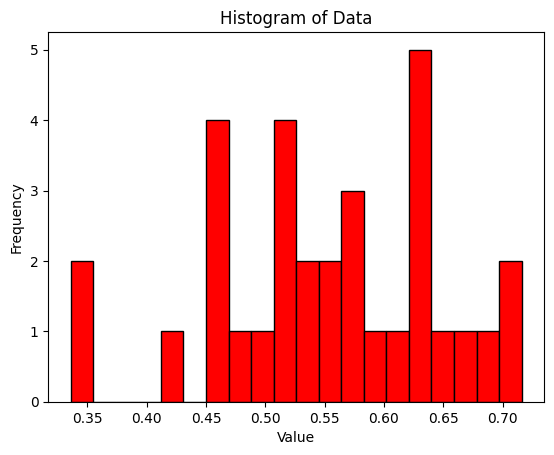

In [ ]:
import matplotlib.pyplot as plt

pts25 = y2025["P"]

plt.hist(pts25, bins=10, edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

ptsp25 = y2025["P%"]

plt.hist(ptsp25, bins=20, edgecolor='black', color = "red")
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
y2024 = pd.read_excel("2024.xlsx")

y2024.head()

print(y2024["W"].mean())
print(y2024["L"].mean())
print(y2024["OT"].mean())

41.0
32.53125
8.46875


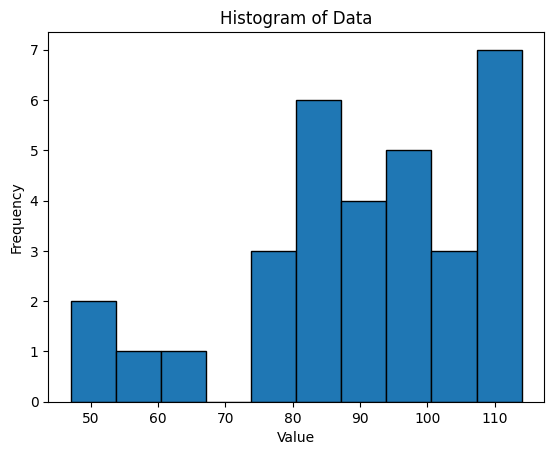

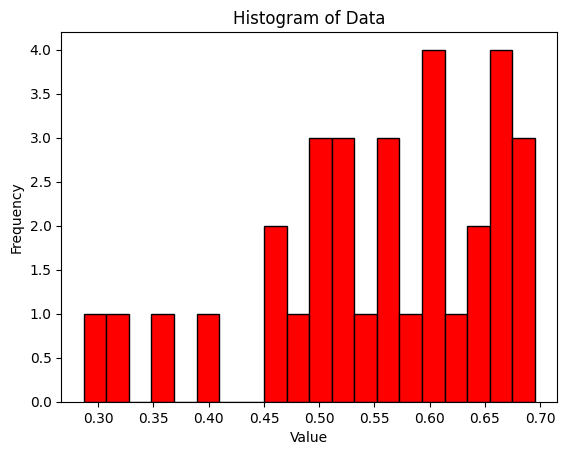

In [ ]:
pts24 = y2024["P"]

plt.hist(pts24, bins=10, edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

ptsp24 = y2024["P%"]

plt.hist(ptsp24, bins=20, edgecolor='black', color = "red")
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pts24_25 = pd.concat([pts25,pts24], ignore_index=True)
pts24_25.sort_values().head()
ptsp24_25 = pd.concat([ptsp25,ptsp24], ignore_index=True)
ptsp24_25.sort_values().head()

,P%
63,0.287
62,0.317
31,0.336
30,0.345
61,0.360


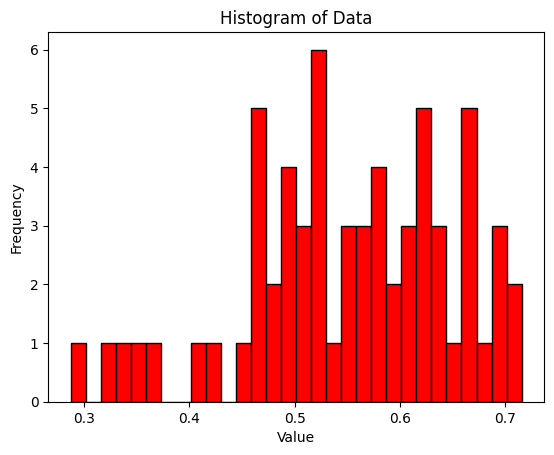

In [ ]:

plt.hist(ptsp24_25, bins=30, edgecolor='black', color = "red")
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

oky so bascailly im looking at if the p% or pts are normal and they ar very not, theoritcally if parity was perfect it should be normal no??? but it is obvisouly left skewed, or possibly multimodal. im interested in this !!!


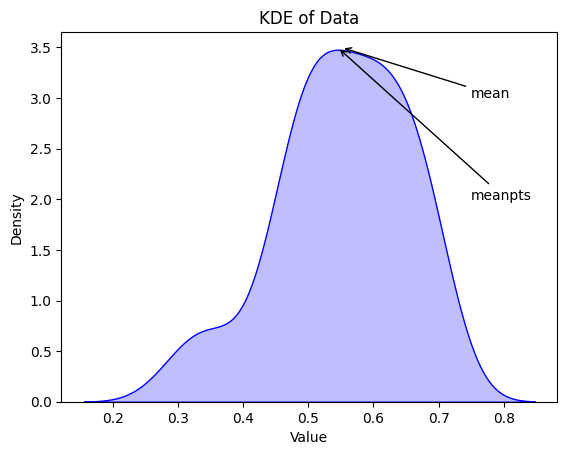

In [ ]:
import seaborn as sns

# Plot KDE to check for multimodality
sns.kdeplot(ptsp24_25, fill=True, color="blue")
plt.annotate("mean", xy=(ptsp24_25.mean(), 3.5), xytext=(.75,3),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate("meanpts", xy=(.545, 3.5), xytext=(.75,2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.title('KDE of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [ ]:
#might just be normal or slightl left skewed ??

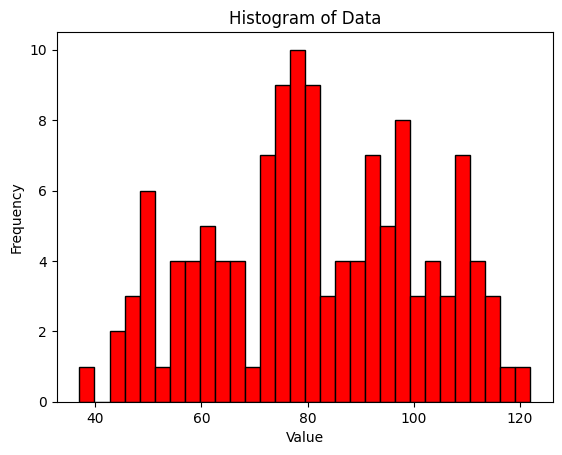

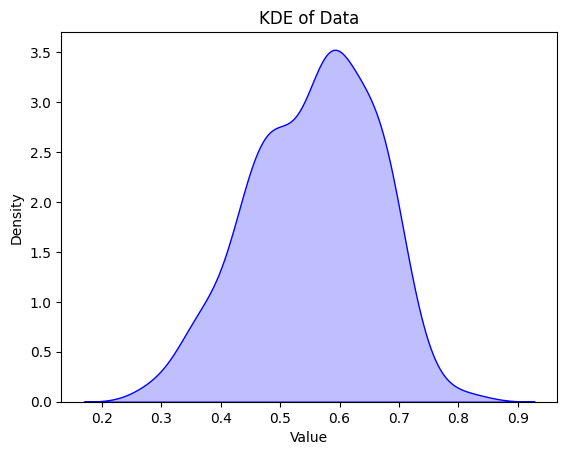

In [ ]:
#here is where we are going to train and learn:
y2022 = pd.read_excel("2022.xlsx")
y2021 = pd.read_excel("2021.xlsx")
y2023 = pd.read_excel("2023.xlsx")
y2020 = pd.read_excel("2020.xlsx")
y2019 = pd.read_excel("2019.xlsx")
y2018 = pd.read_excel("2018.xlsx")
allpts = pd.concat([pts24_25,y2021["P"], y2022["P"]],ignore_index=True)
allpts.sort_values()
plt.hist(allpts, bins=30, edgecolor='black', color = "red")
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
ally = pd.concat([y2024,y2023,y2022,y2021,y2020,y2019,y2018],ignore_index=True)
ally.drop("GP", axis=1, inplace = True)
ally.sort_values("Team")

sns.kdeplot(ally["P%"], fill=True, color="blue")
plt.title('KDE of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [ ]:
ally.sort_values("SC")
test = ally.drop("Season", axis = 1)
test = test.drop("Net PP%", axis = 1)
test = test.drop("Net PK%", axis = 1)
test = test.drop("T", axis = 1)
test = test.drop("S/O Win", axis = 1)
test = test.drop("RW", axis = 1)
test = test.drop("GF", axis = 1)
test = test.drop("GA", axis = 1)
testset = test
test = test.drop("Team", axis = 1)
print(test.dtypes)


team2025 = y2025["Team"]
y2025 = y2025.drop("Season", axis = 1)
y2025 = y2025.drop("GP", axis = 1)
y2025 = y2025.drop("Net PP%", axis = 1)
y2025 = y2025.drop("Net PK%", axis = 1)
y2025 = y2025.drop("T", axis = 1)
y2025 = y2025.drop("S/O Win", axis = 1)
y2025 = y2025.drop("RW", axis = 1)
y2025 = y2025.drop("Team", axis = 1)
y2025 = y2025.drop("GF", axis = 1)
y2025 = y2025.drop("GA", axis = 1)
print(y2025.dtypes)

W             int64
L             int64
OT            int64
P             int64
P%          float64
ROW           int64
GF/GP       float64
GA/GP       float64
PP%         float64
PK%         float64
Shots/GP    float64
SA/GP       float64
FOW%        float64
PLOF        float64
CF            int64
SC            int64
dtype: object
W             int64
L             int64
OT            int64
P             int64
P%          float64
ROW           int64
GF/GP       float64
GA/GP       float64
PP%         float64
PK%         float64
Shots/GP    float64
SA/GP       float64
FOW%        float64
PLOF        float64
CF          float64
SC          float64
dtype: object


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricW

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        32
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.50        32
   macro avg       0.25      0.12      0.17        32
weighted avg       1.00      0.50      0.67        32



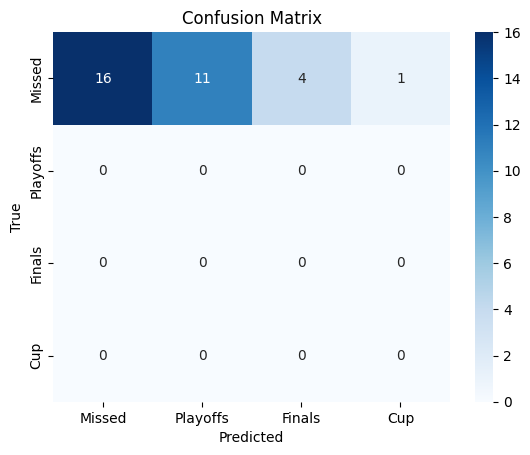


Predictions vs True Labels:
    True Label  Predicted Label                   Team
31           0                0        San Jose Sharks
30           0                0     Chicago Blackhawks
29           0                0    Nashville Predators
28           0                0         Seattle Kraken
27           0                0         Buffalo Sabres
26           0                0          Boston Bruins
25           0                0    Pittsburgh Penguins
24           0                0    Philadelphia Flyers
23           0                0          Anaheim Ducks
22           0                0     New York Islanders
21           0                0      Detroit Red Wings
20           0                0  Columbus Blue Jackets
19           0                0     Montréal Canadiens
18           0                0       New York Rangers
17           0                0       Utah Hockey Club
16           0                0      Vancouver Canucks
8            0                1    T

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create the target variable
def create_target(row):
    playoffs = row['PLOF']
    scup = row['SC']
    confinals = row['CF']

    if scup == 1:
        return 3  # Stanley Cup Winner
    elif confinals == 1:
        return 2  # Conference Finals
    elif playoffs == 1:
        return 1  # Playoffs only
    else:
        return 0  # Did not make playoffs


test['target'] = test.apply(create_target, axis=1)
y2025['target'] = y2025.apply(create_target, axis=1)


X_train = test.iloc[:, :13].values
y_train = test['target'].values
X_test = y2025.iloc[:, :13].values
y_test = y2025['target'].values


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# These weights give more attention to class 2 and 3
manual_weights = {0: 2, 1: 1.4 ,2: 1.7, 3: 3}
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight=manual_weights)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


predictions_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})
final = predictions_df.join(team2025)
print("\nPredictions vs True Labels:")
print(final.sort_values('Predicted Label'))


probs = model.predict_proba(X_test_scaled)
probs_df = pd.DataFrame(probs, columns=[f'Prob_Class_{i}' for i in range(probs.shape[1])])
final_with_probs = pd.concat([final.reset_index(drop=True), probs_df], axis=1)

print(final_with_probs.sort_values('Prob_Class_3'))


THis below is a not very sensitive logistical regression model. It works, but is not sensitive enmough to predic anything more than the top 16 teams being in the playoffs.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Function to create the target variable
def create_target(row):
    # Create the target class based on the last three columns
    playoffs = row['PLOF']
    scup = row['SC']
    confinals = row['CF']

    # Determine the target value based on these columns
    if scup == 1:
        return 3  # Stanley Cup Winner
    elif confinals == 1:
        return 2  # Conference Finals
    elif playoffs == 1:
        return 1  # In the playoffs but not in the finals or cup
    else:
        return 0  # Not in playoffs, not in the finals, not the cup winner

# Apply the create_target function to both datasets
test['target'] = test.apply(create_target, axis=1)
y2025['target'] = y2025.apply(create_target, axis=1)

# Step 2: Prepare features (X) and target (y) for both training and testing
X_train = test.iloc[:, :13].values  # First 15 statistics (assuming last 3 are the binary variables)
y_train = test['target'].values
X_test = y2025.iloc[:, :13].values  # First 15 statistics (assuming last 3 are the binary variables)
y_test = y2025['target'].values

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)
#model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test_scaled)
#y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print out the predictions and the true labels for comparison
predictions_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})
final = predictions_df.join(team2025)
print("\nPredictions vs True Labels:")
print(final.sort_values('Predicted Label'))

# Get probabilities for each class
probs = model.predict_proba(X_test_scaled)

# Add to the final dataframe
probs_df = pd.DataFrame(probs, columns=[f'Prob_Class_{i}' for i in range(probs.shape[1])])
final_with_probs = pd.concat([final.reset_index(drop=True), probs_df], axis=1)

print(final_with_probs.sort_values('Prob_Class_3'))

Accuracy: 0.46875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        32
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.47        32
   macro avg       0.33      0.16      0.21        32
weighted avg       1.00      0.47      0.64        32


Predictions vs True Labels:
    True Label  Predicted Label                   Team
24           0                0    Philadelphia Flyers
31           0                0        San Jose Sharks
29           0                0    Nashville Predators
30           0                0     Chicago Blackhawks
27           0                0         Buffalo Sabres
26           0                0          Boston Bruins
25           0                0    Pittsburgh Penguins
28           0                0         Seattle Kraken
20           0                0  Columbus Blue Jacket

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricW

This model is more sensitive, I have tried to adjust the thrshold, but I might drop it. I changed the class weights so it focusess more on other classes (i.e. stanley cu winner and conference finalist,) but now it is giving too many options as it is predicting four winners and 3 finaliss, when inrelaist it should be 1, but may be bale to sort them by a score ??

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Function to create the target variable
def create_target(row):
    # Create the target class based on the last three columns
    playoffs = row['PLOF']
    scup = row['SC']
    confinals = row['CF']

    # Determine the target value based on these columns
    if scup == 1:
        return 3  # Stanley Cup Winner
    elif confinals == 1:
        return 2  # Conference Finals
    elif playoffs == 1:
        return 1  # In the playoffs but not in the finals or cup
    else:
        return 0  # Not in playoffs, not in the finals, not the cup winner

# Apply the create_target function to both datasets
test['target'] = test.apply(create_target, axis=1)
y2025['target'] = y2025.apply(create_target, axis=1)

# Step 2: Prepare features (X) and target (y) for both training and testing
X_train = test.iloc[:, :13].values  # First 15 statistics (assuming last 3 are the binary variables)
y_train = test['target'].values
X_test = y2025.iloc[:, :13].values  # First 15 statistics (assuming last 3 are the binary variables)
y_test = y2025['target'].values

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Step 4: Get predicted probabilities for the test set
y_pred_prob = model.predict_proba(X_test_scaled)

# Choose a threshold (e.g., 0.7)
threshold = 0.7

# Apply threshold: If the probability of the predicted class is greater than the threshold, classify that class
# If no class meets the threshold, you can either assign the class with the highest probability or set a fallback
y_pred_thresholded = np.argmax(y_pred_prob, axis=1)  # Initially take the class with the highest probability
y_pred_thresholded = np.where(np.max(y_pred_prob, axis=1) > threshold, y_pred_thresholded, -1)  # -1 indicates no class met threshold

# Replace -1 with the most probable class if no class meets the threshold
for i in range(len(y_pred_thresholded)):
    if y_pred_thresholded[i] == -1:
        y_pred_thresholded[i] = np.argmax(y_pred_prob[i])

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_thresholded))
print("Classification Report:\n", classification_report(y_test, y_pred_thresholded))

# Print out the predictions and the true labels for comparison
predictions_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred_thresholded
})
final = predictions_df.join(team2025)
print("\nPredictions vs True Labels:")
print(final.sort_values('Predicted Label'))



Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        32
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.50        32
   macro avg       0.25      0.12      0.17        32
weighted avg       1.00      0.50      0.67        32


Predictions vs True Labels:
    True Label  Predicted Label                   Team
31           0                0        San Jose Sharks
30           0                0     Chicago Blackhawks
29           0                0    Nashville Predators
28           0                0         Seattle Kraken
27           0                0         Buffalo Sabres
26           0                0          Boston Bruins
25           0                0    Pittsburgh Penguins
24           0                0    Philadelphia Flyers
23 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behav